- **<font color=red>Red chapters</font> are chapters where I haven't done anything**
- **<font color=green>Green sentences</font> are questions or notes**

# <font color=red> 1. TitleText</font>

#  <font color=red>2. Introduction</font>

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question



# 3. Preliminary Exploratory Data Analysis

- Demonstrate that the dataset can be read from the web into R 
- Split your data into a training and test set
- **Using only the training set**, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- **Using only the training set**, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis (ggpairs from the GGally R package can be helpful here).


## 3.1 Installing Packages

In [23]:
library("tidyverse")
library("caret")
set.seed(1234)

ERROR: Error in library("qwraps2"): there is no package called 'qwraps2'


## 3.2 Reading & Checking Data 

In [3]:
data <-read_csv("https://raw.githubusercontent.com/knt-tky-van/DSCI_100/master/twitterdata.csv")

data$is_verified <- as.factor(data$is_verified)
data$is_protected <- as.factor(data$is_protected)

head(data)

Parsed with column specification:
cols(
  Twitter_ID = col_double(),
  Twitter_User = col_character(),
  Creation_Date = col_double(),
  Follower_Count = col_double(),
  Friend_Count = col_double(),
  Post_Count = col_double(),
  Liked_Count = col_double(),
  List_Count = col_double(),
  Language = col_character(),
  is_protected = col_double(),
  is_verified = col_double()
)



Twitter_ID,Twitter_User,Creation_Date,Follower_Count,Friend_Count,Post_Count,Liked_Count,List_Count,Language,is_protected,is_verified
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>
9.99e+17,NintendoLaboFR,1526983527,3014,0,10,0,5,en,0,1
9.99e+17,Zero21Dec,1526982877,5829,6,158,1,3,en,0,1
9.99e+17,GoogleCloud_IN,1526951259,368,90,94,276,1,en,0,1
9.99e+17,tver_fwc,1526909603,4898,66,89,2,36,ja,0,1
9.97e+17,ImKRUNKKK,1526633047,1323,7,25,1,1,en,0,1
9.97e+17,PUBGEsports,1526584590,17939,36,48,12,17,en,0,1


In [4]:
# see if "is_verified" colum has something other than "0" and "1"
data %>%
    select(is_verified)  %>% 
    unlist() %>% 
    levels()

[1] "0" "1"

## 3.3 Balancing 

In [5]:
#raw data
data %>% 
    group_by(is_verified) %>%
    summarize(n = n())

is_verified,n
<fct>,<int>
0,972
1,28


In [6]:
#after upsample
data <- upSample(x = select(data, -is_verified),
            y = select(data,is_verified) %>% unlist(),
            yname="is_verified")

data %>% 
    group_by(is_verified) %>%
    summarize(n = n())

is_verified,n
<fct>,<int>
0,972
1,972


## 3.4 Splitting Data into Training/Test Sets
- <font color=green>75% for training and 25% for test for now. What ratio is best?</font>

In [7]:
set_rows <- data %>% 
    select(is_verified) %>% 
    unlist() %>% 
    createDataPartition(p = 0.75, list = FALSE)
    
training_set <- data %>% slice(set_rows)
test_set <- data %>% slice(-set_rows)

scale_transformer <- preProcess(training_set, method = c("center", "scale")) 

training_set <- predict(scale_transformer, training_set)
test_set <- predict(scale_transformer, test_set)

## 3.5 Summarize the Training Data
- <font color=green>Maybe we need more sophisticated table(s) for summary...</font>

In [24]:
#the number of obsevation in each class
#the means of the predictor variables we plan to use
summary(training_set)

   Twitter_ID      Twitter_User       Creation_Date      Follower_Count   
 Min.   :-2.8966   Length:1458        Min.   :-2.98168   Min.   :-0.3486  
 1st Qu.: 0.1057   Class :character   1st Qu.: 0.07597   1st Qu.:-0.3470  
 Median : 0.1057   Mode  :character   Median : 0.07780   Median :-0.3217  
 Mean   : 0.0000                      Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.3366                      3rd Qu.: 0.33887   3rd Qu.:-0.2428  
 Max.   : 3.3389                      Max.   : 2.17916   Max.   : 4.7168  
  Friend_Count         Post_Count        Liked_Count        List_Count     
 Min.   :-0.414567   Min.   :-0.29414   Min.   :-0.3203   Min.   :-0.4130  
 1st Qu.:-0.372090   1st Qu.:-0.28061   1st Qu.:-0.3180   1st Qu.:-0.4130  
 Median :-0.253949   Median :-0.25356   Median :-0.2895   Median :-0.3640  
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:-0.008374   3rd Qu.:-0.09551   3rd Qu.:-0.1056   3rd Qu.: 0.1255  
 Max.   :12.862373 

In [9]:
#how many rows are missing data
sum(is.na(training_set))

[1] 0

## 3.6 Visualize the Training Data

- "Follwer" and "Post" or "Friend" and "Liked" looks nice

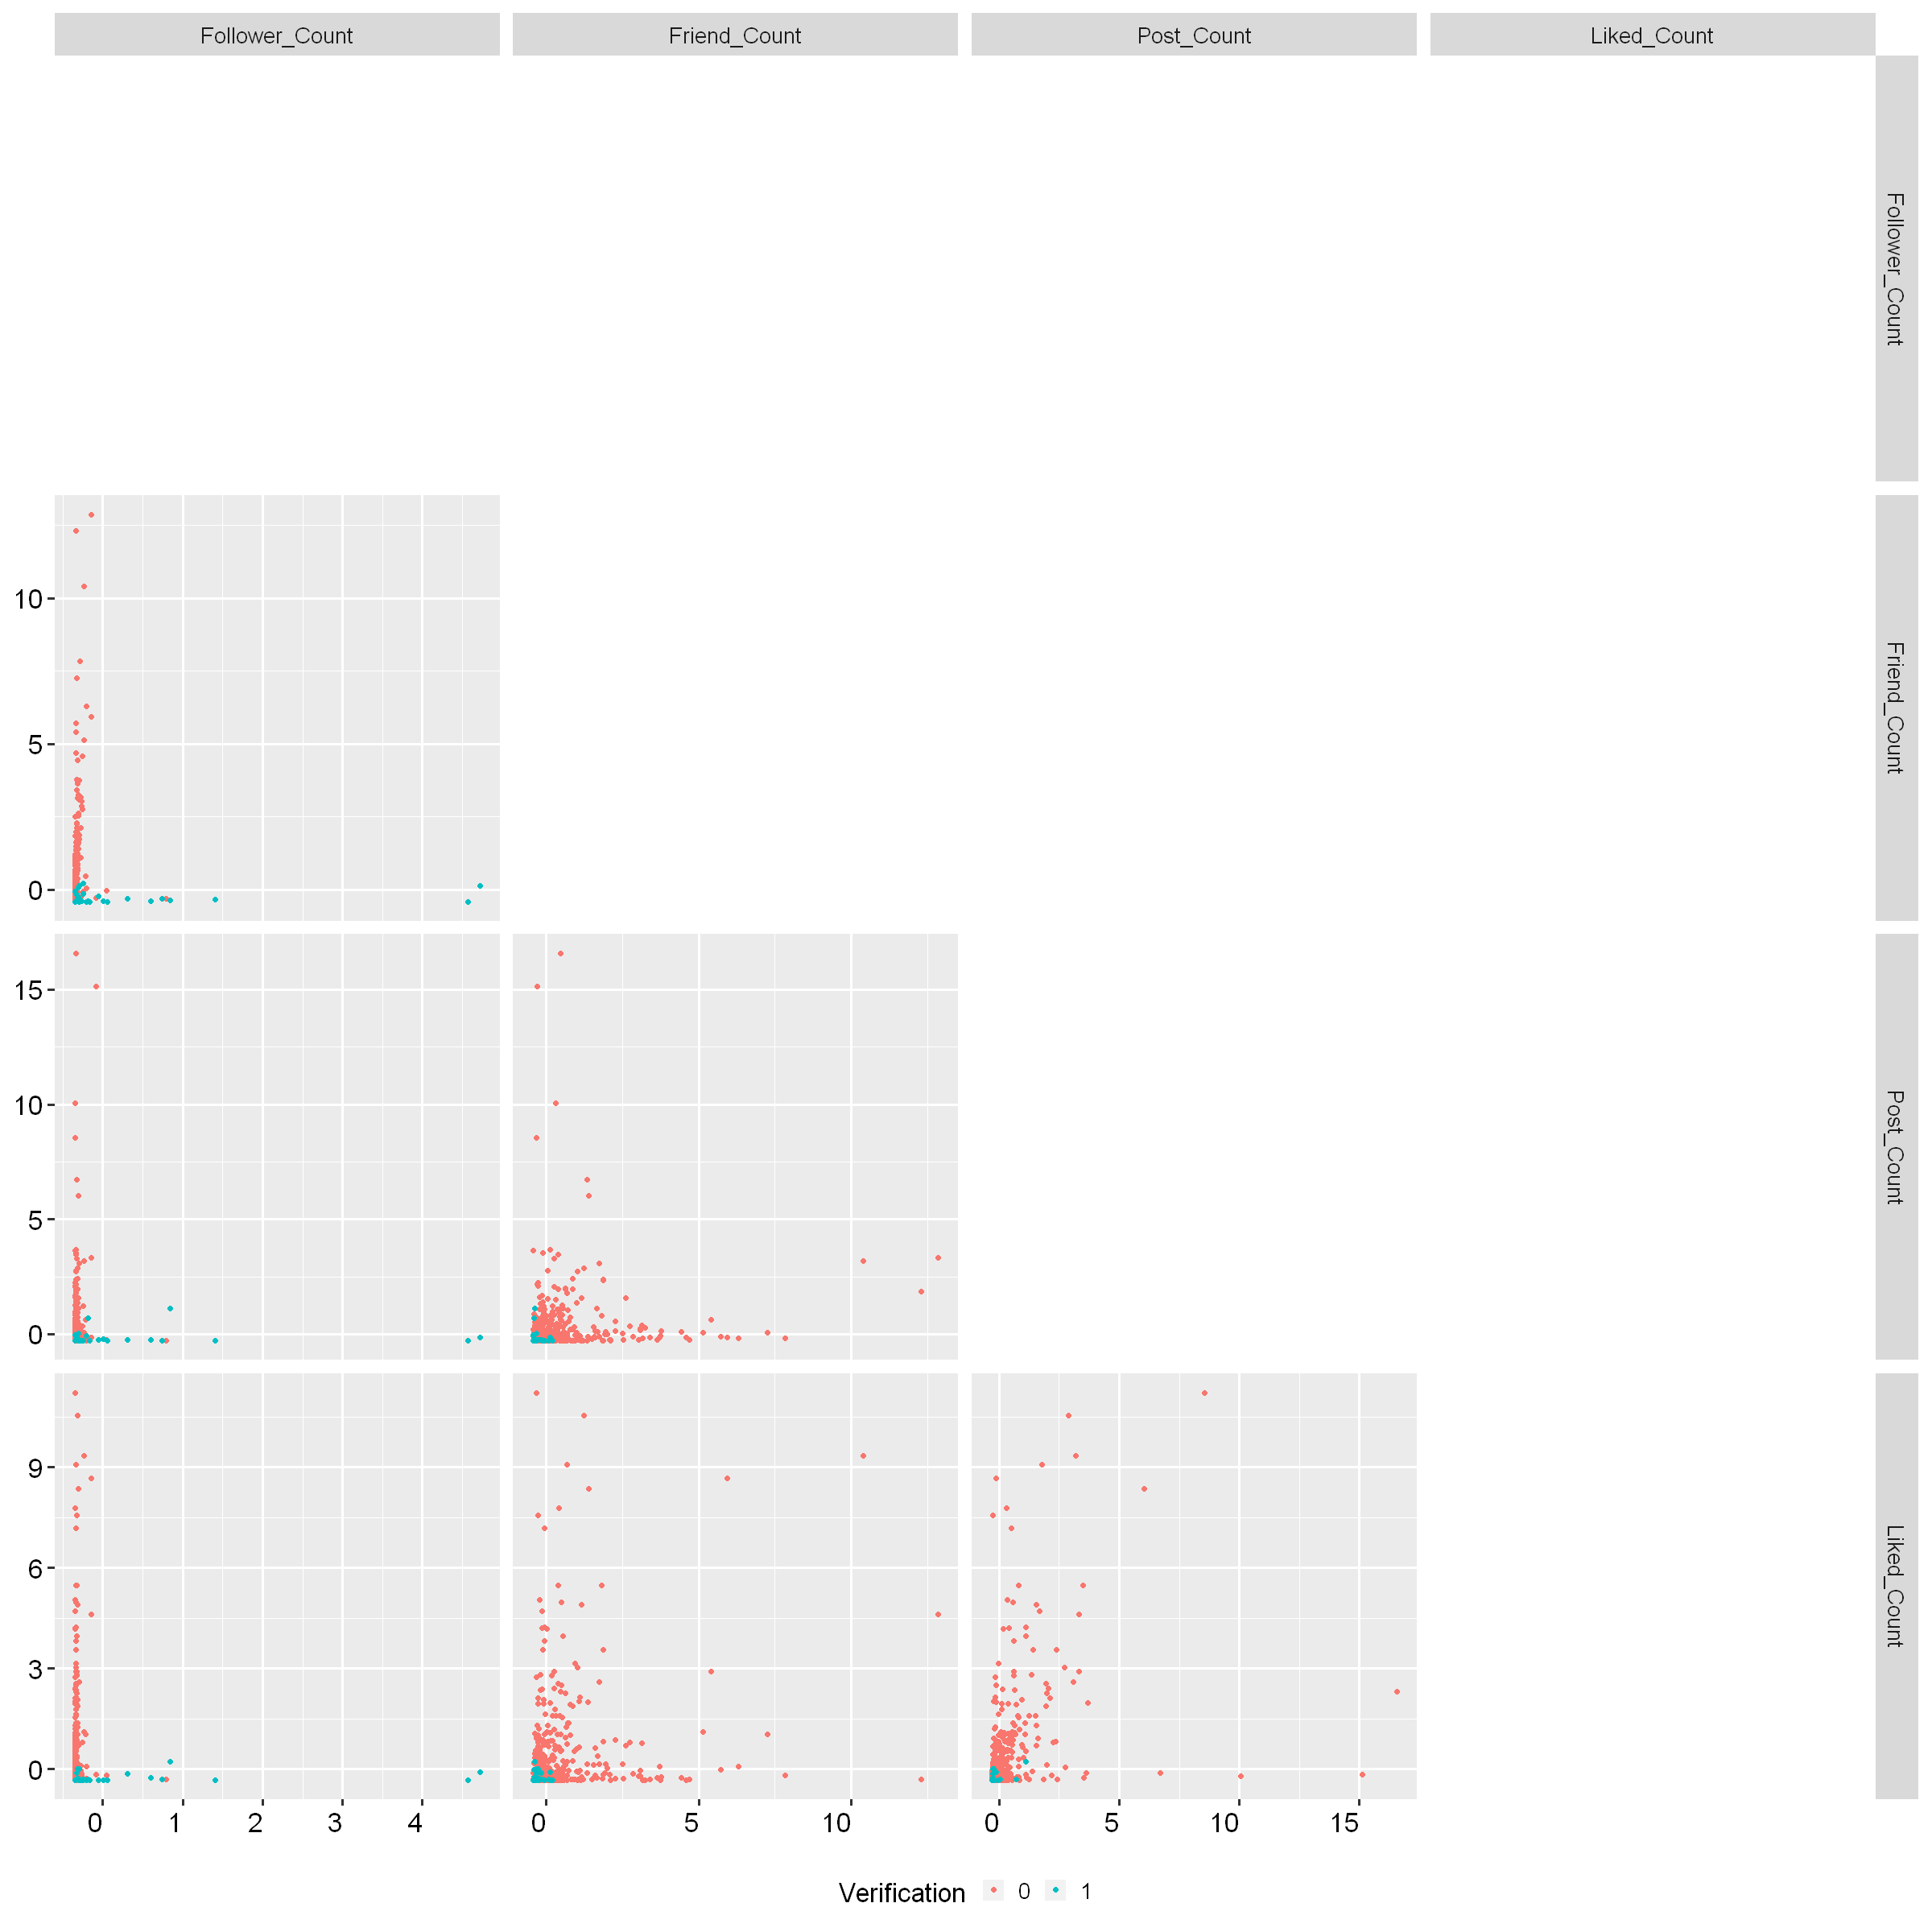

In [25]:
library(GGally)
options(repr.plot.width = 20, repr.plot.height = 20) 

plot_pairs <- training_set %>% 
  select(Follower_Count,Friend_Count,Post_Count,Liked_Count,is_verified) %>% 
  ggpairs(legend=5,
          columns=1:4,
          mapping = ggplot2::aes(color = is_verified),
          upper="blank",
          diag = NULL)+
          labs(color="Verification")+
          theme(axis.text.x = element_text(hjust = 1, color = "black",size=20),
          axis.text.y = element_text(hjust = 1, color = "black",size=20))+
          theme_grey(base_size = 20)+
          theme(legend.position = "bottom")  

plot_pairs

# 4. Method

- Estimate how much cleaning and data wrangling will be needed to take the data from its native format to the format necessary for the analysis you plan to do
- Explain how you will conduct either your classification analysis, and which variables/columns you will use (describe the data table to us). Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the classification results (this is in addition to the visualization created previously for exploratory data analysis)


## 4.1 Cleaning & Wrangling 
- <font color=green>Do we need this? I think data is already tidy. No observation missing data.</font>

## 4.2 Cross-validation (10 folds) & Deciding the Number of K
- <font color=green>Variables for predictors: **Follower_Count and Post_Count** vs. **Friend_Count and Liked_Count** 
- Do we change variables or do we need more variables for prediction?</font>

### 4.2a Follower_Count and Post_Count

In [11]:
# Split data into training and test sets
X_train_a <- training_set %>% 
    select(Follower_Count, Post_Count) %>% 
    data.frame()

Y_train <- training_set %>% 
    select(is_verified) %>% 
    unlist()

X_test_a <- test_set %>% 
    select(Follower_Count, Post_Count) %>% 
    data.frame()

Y_test <- test_set %>% 
    select(is_verified) %>% 
    unlist()

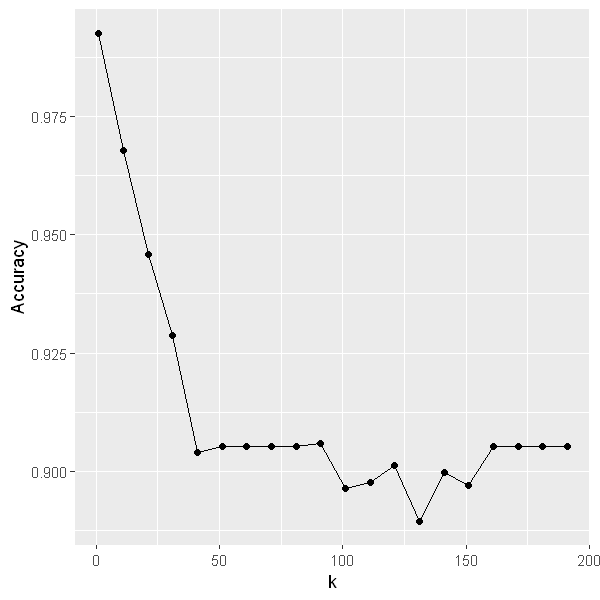

In [12]:
# Choosing K (1)
options(repr.plot.width = 5, repr.plot.height = 5) 

train_control <- trainControl(method="cv", number = 10)

k = data.frame(k = seq(from = 1, to = 200, by = 10))
knn_model_cv_10fold <- train(x = X_train_a, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)

accuracy <-knn_model_cv_10fold$results
accuracy_vs_k_lots <- ggplot(accuracy, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k_lots

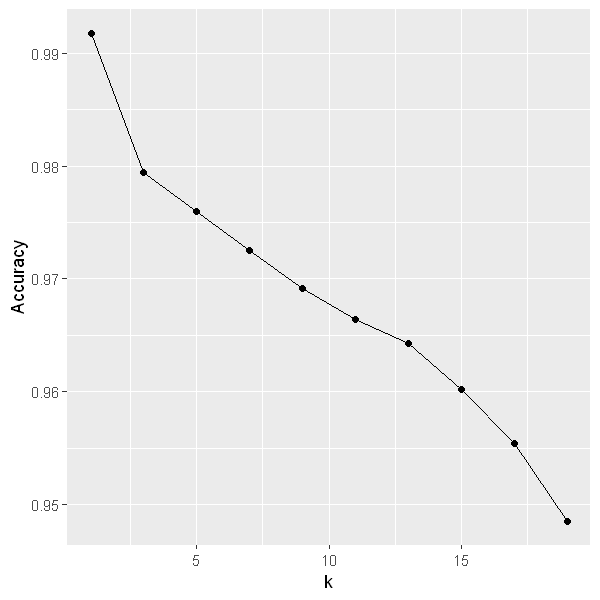

In [13]:
#choosing K(2)
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1,3,5,7,9,11,13,15,17,19))

knn_model_cv_10fold <- train(x = X_train_a, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
accuracy_2 <-knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracy_2, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()

accuracy_vs_k

### 4.2b Friend_Count, Liked_Count

In [14]:
# Split data into training and test sets
X_train_b <- training_set %>% 
    select(Friend_Count, Liked_Count) %>% 
    data.frame()

X_test_b <- test_set %>% 
    select(Friend_Count, Liked_Count) %>% 
    data.frame()

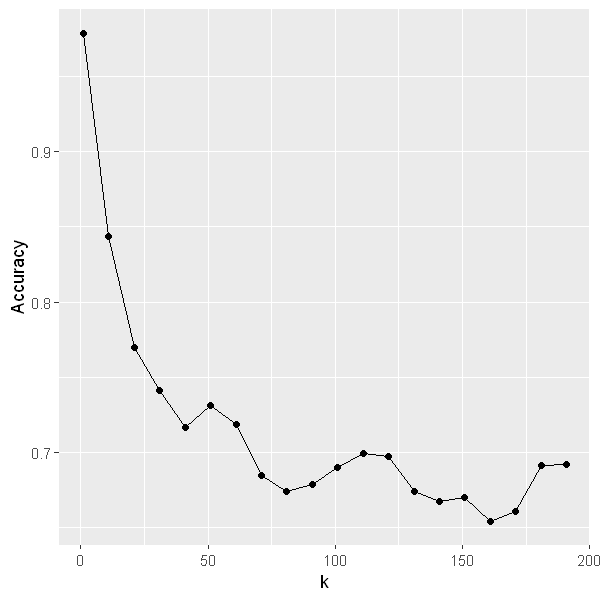

In [15]:
# Choosing K (1)
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = seq(from = 1, to = 200, by = 10))

knn_model_cv_10fold <- train(x = X_train_b, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)

accuracy <-knn_model_cv_10fold$results
accuracy_vs_k_lots <- ggplot(accuracy, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k_lots

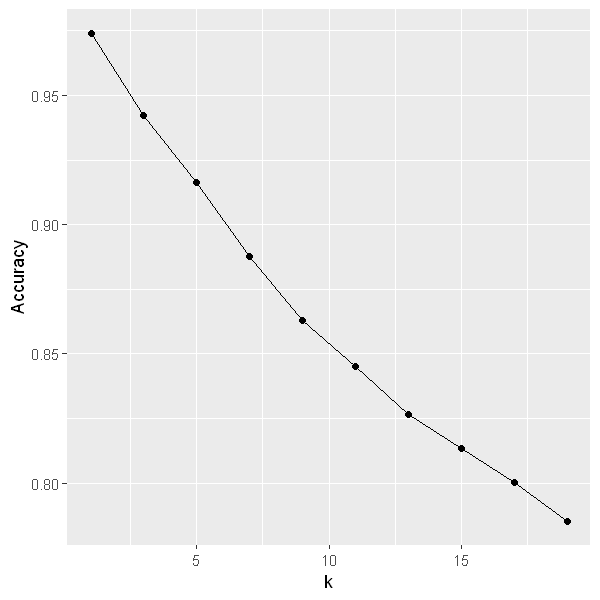

In [16]:
#choosing K(2)
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1,3,5,7,9,11,13,15,17,19))

knn_model_cv_10fold <- train(x = X_train_b, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
accuracy_2 <-knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracy_2, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()

accuracy_vs_k

## 4.3 Training Error 


In [17]:
#4.2a Follower_Count and Post_Count
error <- train(x = X_train_a, y = Y_train, method = "knn", tuneGrid = data.frame(k=1))
training_pred <- predict(object=error, X_train_a)
training_results <- confusionMatrix(training_pred, Y_train)
training_results$overall[1]

Accuracy 
       1

In [18]:
#4.2b Friend_Count and  Liked_Count
error <- train(x = X_train_b, y = Y_train, method = "knn", tuneGrid = data.frame(k=1))
training_pred <- predict(object=error, X_train_b)
training_results <- confusionMatrix(training_pred, Y_train)
training_results$overall[1]

Accuracy 
0.994513

## 4.4 Result (Test Data)

In [19]:
#4.2a Follower_Count and Post_Count
k = data.frame(k = 1)
model_knn_a <- train(x = X_train_a, y = Y_train, method = "knn", tuneGrid = k)

Y_test_predicted_a <- predict(object = model_knn_a, X_test_a)

model_quality_a <- confusionMatrix(data = Y_test_predicted_a, reference = Y_test)
model_quality_a$overall[1]

Accuracy 
0.9958848

In [20]:
#4.2b Friend_Count and  Liked_Count
k = data.frame(k = 1)
model_knn_b <- train(x = X_train_b, y = Y_train, method = "knn", tuneGrid = k)

Y_test_predicted_b <- predict(object = model_knn_b, X_test_b)

model_quality_b <- confusionMatrix(data = Y_test_predicted_b, reference = Y_test)
model_quality_b$overall[1]

Accuracy 
0.9855967

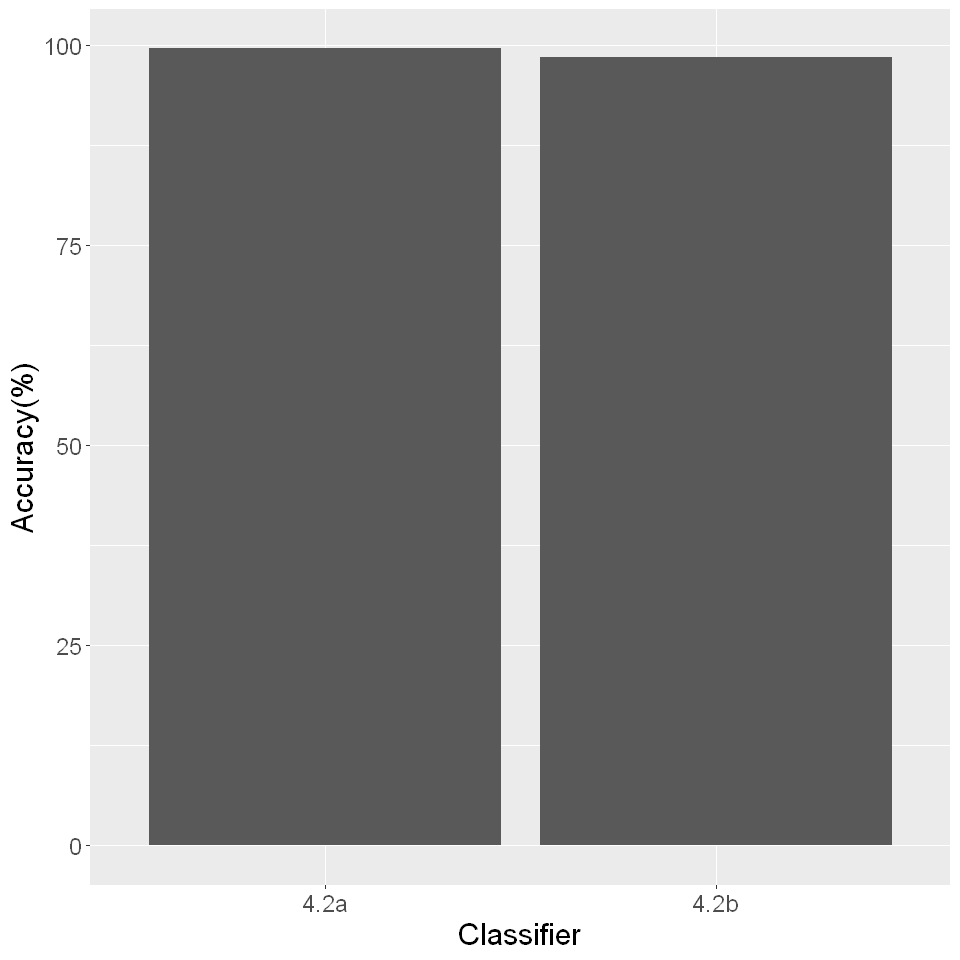

In [21]:
options(repr.plot.width = 8, repr.plot.height = 8) 
a <- data.frame(classifier="4.2a",accuracy=model_quality_a$overall[1]) 
rownames(a) <- c()
b <- data.frame(classifier="4.2b",accuracy=model_quality_b$overall[1]) 
rownames(b) <- c()

rbind(a,b) %>% ggplot(aes(x=classifier,y=accuracy*100))+
    geom_bar(stat = "identity")+
    labs(x="Classifier",y="Accuracy(%)",cex.lab=10)+
    theme(text = element_text(size = 18))
    

#  <font color=red> 5. Expected Outcomes and Significance</font>

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?
